In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import calendar
from datetime import datetime
import statsmodels
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
print('Numpy version \t', np.__version__)
print('Matplotlib version \t', matplotlib.__version__)
print('Pandas version \t', pd.__version__)
print('Seaborn version \t', sns.__version__)
print('Seaborn version \t', sns.__version__)
print('statsmodels version \t', statsmodels.__version__)
print('sklearn version \t', sklearn.__version__)

Numpy version 	 1.22.3
Matplotlib version 	 3.5.1
Pandas version 	 1.4.2
Seaborn version 	 0.11.2
Seaborn version 	 0.11.2
statsmodels version 	 0.13.2
sklearn version 	 1.0.2


## Reading and Analysis Data

In [4]:
dfbike = pd.read_csv('day.csv')
dfbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
dfbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
dfbike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

__data have no Nan and null data__

In [7]:
dfbike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
dfbike.shape

(730, 16)

In [9]:
dfbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


> ['instant'] is the index so it can be dropped </br>
> ['dteday'] can be represented by columns year, month ... so it can also be omitted </br>
> ['casual', 'registered'] is represented via cnt so it doesn't bring much value </br>
> ['atemp'] and ['are'] only correlated, so it can be omitted </br>

In [10]:
dfbike.drop(['instant','dteday','casual','atemp','registered'],axis=1,inplace=True)

In [11]:
dfbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
dfbike.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [13]:
# mapping number categorical to text
dfbike.season = dfbike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
dfbike.mnth = dfbike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
dfbike.weekday = dfbike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
dfbike.weathersit = dfbike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [14]:
dfbike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [15]:
dfbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


## Exploratory Data Analysis


[Text(0.5, 0, 'weekday'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On cnt of Weekday')]

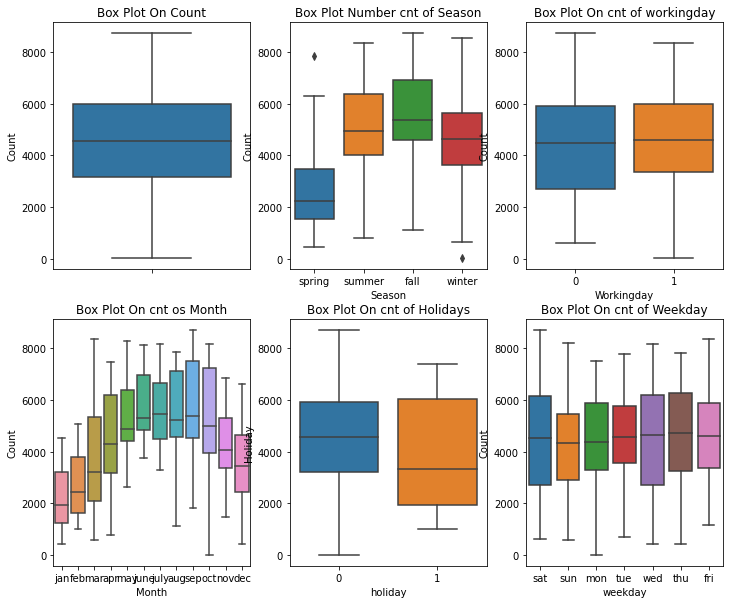

In [16]:
#season	day	yr	mnth	holiday	weekday	workingday	weathersit	
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(12, 10)
sns.boxplot(data=dfbike,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=dfbike,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=dfbike,y="cnt",x="workingday",orient="v",ax=axes[0][2])
sns.boxplot(data=dfbike,y="cnt",x="mnth",orient="v",ax=axes[1][0])
sns.boxplot(data=dfbike,y="cnt",x="holiday",orient="v",ax=axes[1][1])
sns.boxplot(data=dfbike,y="cnt",x="weekday",orient="v",ax=axes[1][2])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot Number cnt of Season")
axes[0][2].set(xlabel='Workingday', ylabel='Count',title="Box Plot On cnt of workingday")
axes[1][0].set(xlabel='Month', ylabel='Count',title="Box Plot On cnt os Month")

axes[1][1].set(ylabel='Holiday',title="Box Plot On cnt of Holidays")
axes[1][2].set(xlabel='weekday', ylabel='Count',title="Box Plot On cnt of Weekday")


__Looking at the Month chart, the big cnt ratio is in April-July.</br>This is the last month of spring and early autumn, in US the climate is warm and this is the time when tourists are crowded__

<AxesSubplot:xlabel='season,yr'>

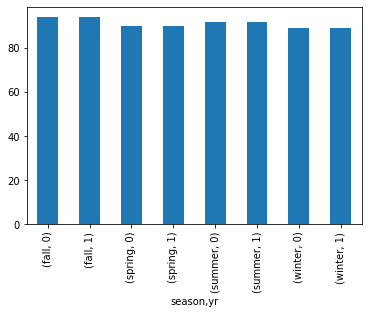

In [17]:
dfbike.groupby(['season','yr'])['yr'].count().plot.bar()

<AxesSubplot:xlabel='mnth,yr'>

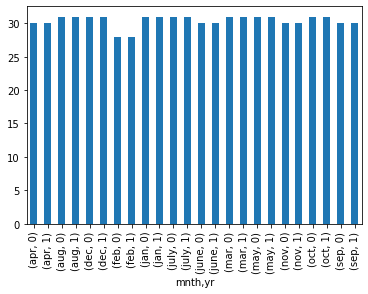

In [18]:
dfbike.groupby(['mnth','yr'])['yr'].count().plot.bar()

<AxesSubplot:xlabel='weathersit,yr'>

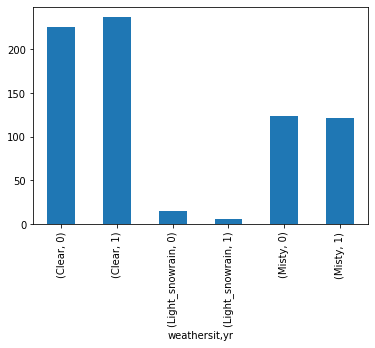

In [19]:
dfbike.groupby(['weathersit','yr'])['yr'].count().plot.bar()

In [20]:
dfbike.shape

(730, 11)

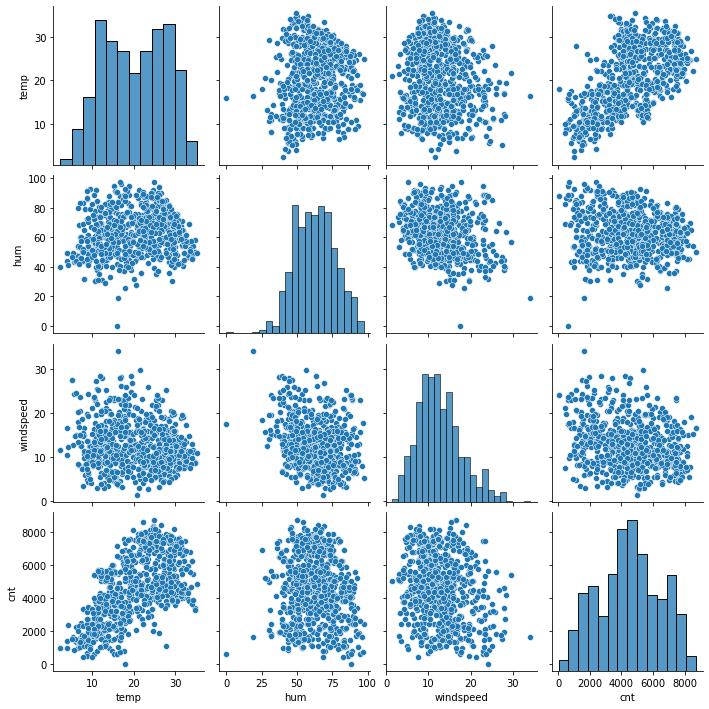

In [21]:
sns.pairplot(dfbike[["temp","hum","windspeed","cnt"]])

__We can see that there is a correlation between cnt and temp, but the correlation coefficient is not clear,</br> so nothing can be decided.</br>To come up with a solution, we will analyze more__

<AxesSubplot:>

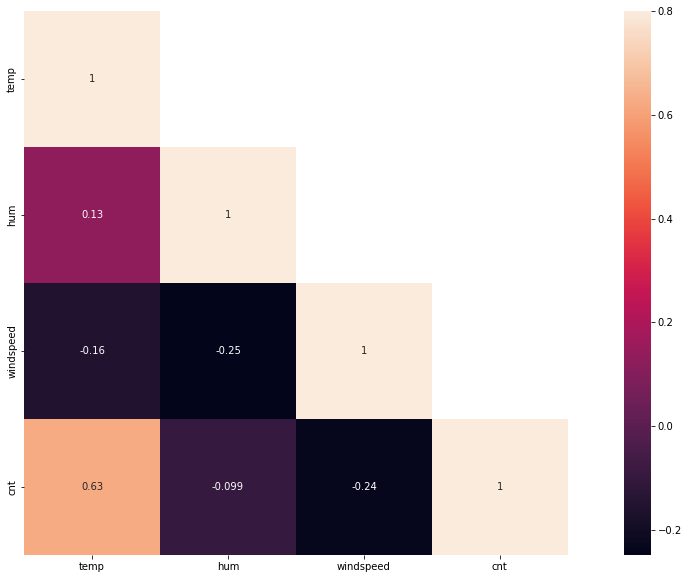

In [22]:
corrMatt = dfbike[["temp","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [23]:
serMonth=pd.get_dummies(dfbike.mnth,drop_first=True)
serSesion=pd.get_dummies(dfbike.season,drop_first=True)
serWeek=pd.get_dummies(dfbike.weekday,drop_first=True)
serWeat=pd.get_dummies(dfbike.weathersit,drop_first=True)

dfbike_crNew = pd.concat([dfbike,serMonth,serSesion, serWeek,serWeat],axis=1)
dfbike_crNew.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
dfbike_crNew.shape

(730, 29)

In [24]:
dfbike_crNew.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Training model

In [25]:
# Create train test split
np.random.seed(0)
df_train, df_test = train_test_split(dfbike_crNew, test_size=0.3, random_state = 42)
df_train.shape, df_test.shape

((511, 29), (219, 29))

In [26]:
df_test_CP = df_test.copy()
mms = MinMaxScaler()
sclCol = ['temp','hum','windspeed','cnt']
df_train[sclCol] = mms.fit_transform(df_train[sclCol])
df_test_CP[sclCol] = mms.transform(df_test_CP[sclCol])

In [27]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
683,1,0,1,0.327133,0.639330,0.327101,0.605336,0,0,0,...,0,1,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0.609320,0,0,0,...,0,1,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0.554026,0,0,0,...,1,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,0.088253,0,1,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0.862127,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [28]:
#split X_train, y_train from df_train
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test_CP.pop('cnt')
X_test = df_test_CP

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
mse

0.008471022204296625

__mse coefficient is very small, at first glance it looks good, but we need further analysis to avoid Overfit__

In [30]:
# Cal Cof VIF
def compute_vif(input_features):
    X = dfbike_crNew[input_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [31]:
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
2,workingday,inf
22,sun,inf
21,sat,inf
1,holiday,inf
17,spring,10.410441


__The correlation in VIF is very large(infinity), so we will gradually remove the values because it is the largest__

In [32]:
X_train=X_train.drop(["workingday"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
16,spring,10.410441
18,winter,8.328374
17,summer,7.963782
2,temp,6.999839
13,nov,6.389741


In [33]:
X_train  = X_train.drop(["spring"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
2,temp,6.899400
13,nov,6.389741
14,oct,6.251559
6,dec,5.518372
17,winter,5.287464


In [34]:
X_train  = X_train.drop(["temp"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
13,oct,6.225761
12,nov,6.028305
16,winter,5.284369
15,summer,5.035583
5,dec,4.917938


In [35]:
X_train  = X_train.drop(["oct"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
15,winter,3.457520
14,summer,3.329791
4,aug,2.515509
8,july,2.515241
7,jan,2.469359


In [36]:
X_train_l1 = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_l1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     86.05
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.85e-158
Time:                        23:31:27   Log-Likelihood:                 441.20
No. Observations:                 511   AIC:                            -832.4
Df Residuals:                     486   BIC:                            -726.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4630      0.042     11.

In [37]:
X_train  = X_train.drop(["wed"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
15,winter,3.457439
14,summer,3.329429
8,july,2.515221
4,aug,2.514984
7,jan,2.468758


In [38]:
X_train_l2 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_l2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     89.97
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.20e-159
Time:                        23:31:27   Log-Likelihood:                 441.19
No. Observations:                 511   AIC:                            -834.4
Df Residuals:                     487   BIC:                            -732.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4613      0.041     11.

__Continue to remove features with high P value__ 

In [39]:
X_train  = X_train.drop(["sat"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
15,winter,3.457328
14,summer,3.329064
8,july,2.515172
4,aug,2.514242
7,jan,2.468735


In [40]:
X_train_l3 = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train,X_train_l3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     94.21
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.80e-160
Time:                        23:31:27   Log-Likelihood:                 441.11
No. Observations:                 511   AIC:                            -836.2
Df Residuals:                     488   BIC:                            -738.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4588      0.040     11.

In [41]:
X_train  = X_train.drop(["thu"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
15,winter,3.457267
14,summer,3.328904
8,july,2.515152
4,aug,2.514197
7,jan,2.468719


In [42]:
X_train_l4 = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train,X_train_l4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     98.80
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.26e-161
Time:                        23:31:27   Log-Likelihood:                 440.89
No. Observations:                 511   AIC:                            -837.8
Df Residuals:                     489   BIC:                            -744.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4630      0.040     11.

In [43]:
X_train  = X_train.drop(["hum"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
14,winter,3.441965
13,summer,3.328155
7,july,2.515096
3,aug,2.510220
6,jan,2.460371


In [44]:
X_train_l5 = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train,X_train_l5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.13e-161
Time:                        23:31:27   Log-Likelihood:                 439.86
No. Observations:                 511   AIC:                            -837.7
Df Residuals:                     490   BIC:                            -748.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4204      0.026     16.

In [45]:
X_train  = X_train.drop(["mon"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
14,winter,3.438088
13,summer,3.326733
7,july,2.514341
3,aug,2.508921
6,jan,2.459379


In [46]:
X_train_l6 = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train,X_train_l6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.74e-162
Time:                        23:31:27   Log-Likelihood:                 438.45
No. Observations:                 511   AIC:                            -836.9
Df Residuals:                     491   BIC:                            -752.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4167      0.026     16.

In [47]:
X_train  = X_train.drop(["tue"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
14,winter,3.437864
13,summer,3.326579
7,july,2.514192
3,aug,2.508911
6,jan,2.459276


In [48]:
X_train_l7 = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train,X_train_l7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     114.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.88e-162
Time:                        23:31:28   Log-Likelihood:                 437.43
No. Observations:                 511   AIC:                            -836.9
Df Residuals:                     492   BIC:                            -756.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4140      0.026     16.

In [49]:
X_train  = X_train.drop(["mar"],axis=1)
dfbike_col = X_train.columns.tolist()
vif_rs = compute_vif(dfbike_col).sort_values('VIF', ascending=False)
vif_rs[:5]

,Variable,VIF
12,summer,2.909307
13,winter,2.574978
7,july,1.792032
3,aug,1.774692
6,jan,1.738057


In [50]:
X_train_l8 = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train,X_train_l8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     120.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.61e-163
Time:                        23:31:28   Log-Likelihood:                 435.86
No. Observations:                 511   AIC:                            -835.7
Df Residuals:                     493   BIC:                            -759.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3898      0.021     18.

> At this point, we see three things: </br> 1: 'F-statistic' value is very large compared to 1 (120.1).</br> 2: 'Prob (F-statistic)' value is very small (7.61e-163), asymptote to 0. </br>
> 3: P>|t| values have no values greater than 0.05. This shows that the model has processed and selected the right parameters for training

In [51]:
# We have the following multilinear function coefficients:
lr_8.params

const             0.389828
yr                0.249613
holiday          -0.084761
windspeed        -0.109075
aug               0.176169
dec              -0.176433
feb              -0.153688
jan              -0.205101
july              0.172501
june              0.146602
may               0.094226
nov              -0.145044
sep               0.185483
summer            0.072334
winter            0.180265
sun              -0.056351
Light_snowrain   -0.290066
Misty            -0.092348
dtype: float64

### General equation

__y = 0.249613*yr - 0.08*holiday - 0.11*windspeed + 0.18*aug - 0.18*dec - 0.15*feb - 0.2*jan + 0.17*july + 0.09*may - 0.14*nov + 0.18*sep + 0.07*summer + 0.18*winter - 0.06*sun - 0.29*Light_snowrain - 0.09*Misty + 0.39__

In [52]:
X_train.head()

,yr,holiday,windspeed,aug,dec,feb,jan,july,june,may,nov,sep,summer,winter,sun,Light_snowrain,Misty
683,1,0,0.327101,0,0,0,0,0,0,0,1,0,0,1,0,0,1
645,1,1,0.419004,0,0,0,0,0,0,0,0,0,0,1,0,0,1
163,0,0,0.708724,0,0,0,0,0,1,0,0,0,1,0,0,0,0
360,0,0,0.415925,0,1,0,0,0,0,0,0,0,0,0,0,0,1
640,1,0,0.110593,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [53]:
y_train_pred = lr_8.predict(X_train_l8)

Text(0.5, 0, 'Errors')

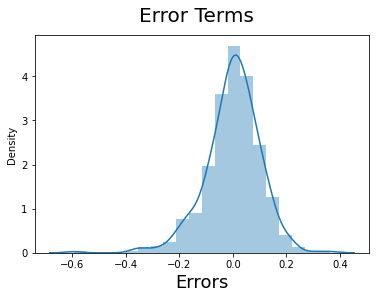

In [54]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

> __The error distribution has the form of a Normal distribution__

## Apply to find the final model factor

In [55]:
sclCol = ['temp','hum','windspeed','cnt']
df_test[sclCol] = mms.transform(df_test[sclCol])
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
col1 = X_train.columns
X_test = X_test[col1]
X_test_l8 = sm.add_constant(X_test)
y_pred = lr_8.predict(X_test_l8)

(0.07084130786177317,
 1.1450752551138106,
 0.03556302577907391,
 1.1097969730311115)

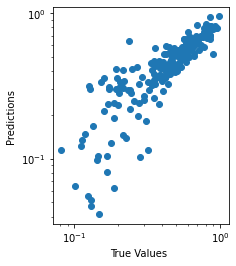

In [57]:
g=plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

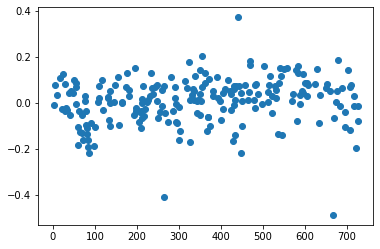

In [58]:
plt.plot(y_test - y_pred,marker='o',linestyle='')

__We see that the error when small is in the range -0.2 to 0.2__

In [59]:
r2 = r2_score(y_test, y_pred)
r2

0.8139053962982666

## r2 = 0.8139 This is not a bad result, but not necessarily the best one either. We can apply more R-Adjust or Deep learning to achieve better results